In [1]:
import numpy as np
import librosa
import librosa.display
import matplotlib.pyplot as plt

from main import stft, instft

In [2]:
def get_spec(data, win_size, overlap):
    cv = stft(wave_data, win_size=win_size, overlap=overlap)
    db = librosa.amplitude_to_db(np.abs(cv))
    
    return db

In [3]:
wave_data, sr = librosa.load('./sounds/sample.wav')

In [4]:
params = [
    {"win_size": 1024, "overlap": 1.0},
    {"win_size": 1024, "overlap": 0.5},
    {"win_size": 1024, "overlap": 0.1},
    {"win_size": 2**10, "overlap": 0.5},
    {"win_size": 2**5, "overlap": 0.5},
    {"win_size": 2**15, "overlap": 0.5},
]

/Users/daishin/Documents/rinko/rinko_env/lib/python3.8/site-packages/librosa/display.py:974: MatplotlibDeprecationWarning: The 'basey' parameter of __init__() has been renamed 'base' since Matplotlib 3.3; support for the old name will be dropped two minor releases later.
  scaler(mode, **kwargs)
/Users/daishin/Documents/rinko/rinko_env/lib/python3.8/site-packages/librosa/display.py:974: MatplotlibDeprecationWarning: The 'linthreshy' parameter of __init__() has been renamed 'linthresh' since Matplotlib 3.3; support for the old name will be dropped two minor releases later.
  scaler(mode, **kwargs)
/Users/daishin/Documents/rinko/rinko_env/lib/python3.8/site-packages/librosa/display.py:974: MatplotlibDeprecationWarning: The 'linscaley' parameter of __init__() has been renamed 'linscale' since Matplotlib 3.3; support for the old name will be dropped two minor releases later.
  scaler(mode, **kwargs)


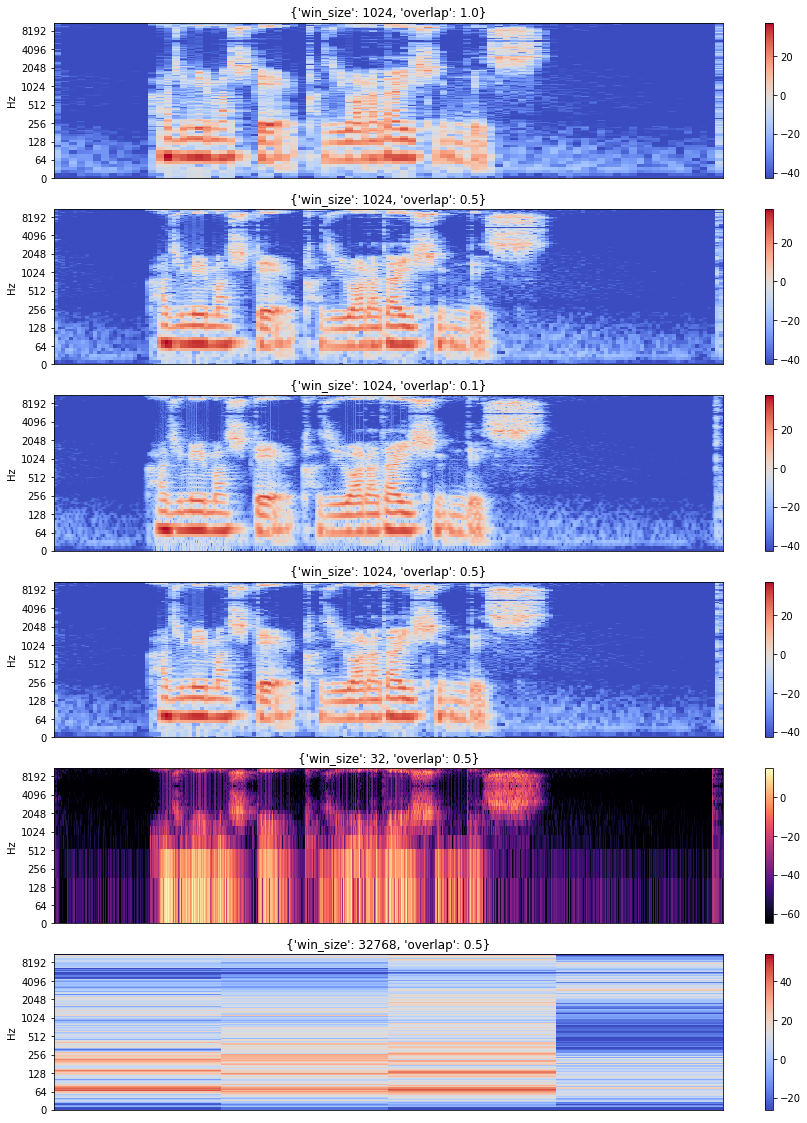

In [5]:
fig, axes = plt.subplots(len(params), 1, figsize=(15, 20))
for i, p in enumerate(params):
    res = get_spec(wave_data, **p)
    spec_img = librosa.display.specshow(res, sr=sr, y_axis='log', ax=axes[i])
    axes[i].set(title=p)
    fig.colorbar(spec_img, ax=axes[i])

In [6]:
fig.savefig('variable_params.png')